In [1]:
from gensim.models import Word2Vec
import numpy as np
from datetime import datetime
from random import shuffle
import pickle
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from scipy.spatial.distance import cosine

In [3]:
# load pkl file
def load_obj(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
# save emb to pkl file
def save_obj(obj, filename):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

## load the feature dict with only dx, px, rg
dictionary = load_obj('dictionary.pkl')
reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 

In [2]:
with open('Data/full_feature.txt','r') as f:
    counter = 0
    full_dict = {}
    for line in f:
        if line[0] != 'g':  #### exclude two files: input_generid.csv, input_thergrp.csv
            full_dict[line.strip()] = counter
            counter += 1
        
reverse_full_dict = dict(zip(full_dict.values(), full_dict.keys())) 

In [ ]:
# create the sentences for gensim

time_window = 14
sentences = []
for l in range(54):
    print(l,datetime.now())
    loadata = np.load('Data/0702data'+str(l)+'.npz')
    x=loadata['InputX3D']
    x=np.concatenate((x[:,:,:505],x[:,:,539:]),axis=2)
    for p in range(len(x)):
        for i in range(len(x[p]-time_window)):
            xx = np.multiply(np.minimum(np.sum(x[p,i:i+time_window,],0),1),np.arange(2070)+1)
            xx = xx[xx != 0]
            if len(xx) > 1:
                shuffle(xx)
                sentences.append([reverse_full_dict[key-1] for key in xx])

0 2018-07-08 23:58:36.461760
1 2018-07-09 00:08:51.641768
2 2018-07-09 00:19:06.942014
3 2018-07-09 00:29:22.789145
4 2018-07-09 00:39:34.979031
5 2018-07-09 00:49:50.283803
6 2018-07-09 01:00:05.480944
7 2018-07-09 01:10:22.983615
8 2018-07-09 01:20:40.846818
9 2018-07-09 01:30:53.885897
10 2018-07-09 01:41:11.220155
11 2018-07-09 01:51:23.253872
12 2018-07-09 02:01:34.347775
13 2018-07-09 02:11:54.416977
14 2018-07-09 02:22:05.480533
15 2018-07-09 02:32:17.480159
16 2018-07-09 02:42:39.421819
17 2018-07-09 02:52:51.603176
18 2018-07-09 03:03:03.626958
19 2018-07-09 03:13:15.093323
20 2018-07-09 03:23:40.413856
21 2018-07-09 03:33:51.955880
22 2018-07-09 03:44:04.888397
23 2018-07-09 03:54:16.008856
24 2018-07-09 04:04:43.492656
25 2018-07-09 04:14:56.284841
26 2018-07-09 04:25:07.780480
27 2018-07-09 04:35:20.119883
28 2018-07-09 04:45:31.924678
29 2018-07-09 04:55:44.507828
30 2018-07-09 05:06:15.830874
31 2018-07-09 05:16:28.664871
32 2018-07-09 05:26:42.191237
33 2018-07-09 05:36:

In [ ]:
# train the model
emb_size = 100

print(datetime.now())
model = Word2Vec(sentences, sg=1, size=emb_size, window=100, min_count=5, workers=4, hs=0, negative=5)
print(datetime.now())

2018-07-10 10:07:10.622458


In [ ]:
print(datetime.now())
emb = np.zeros((2070,emb_size))
for i in range(2070):
    try:
        emb[i,:] = model.wv[reverse_full_dict[i]]
    except KeyError:
        continue

In [9]:
emb.shape

(2070, 200)

In [ ]:
# save emb to pkl file
print(datetime.now())
def save_obj(obj, filename):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
save_obj(emb, 'gensim_2070_feature_emb_28_300.pkl')

In [3]:
### for future tsne&plot run from this cell

# load pkl file
def load_obj(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
dictionary = load_obj('dictionary.pkl')
reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
emb = load_obj('gensim_emb.pkl')

In [10]:
emb_2d = TSNE(n_components=2).fit_transform(emb)   #, perplexity=100, n_iter=1000).fit_transform(emb)

In [12]:
x = emb_2d[:,0]
y = emb_2d[:,1]
z = [reverse_full_dict[key] for key in range(2070)]

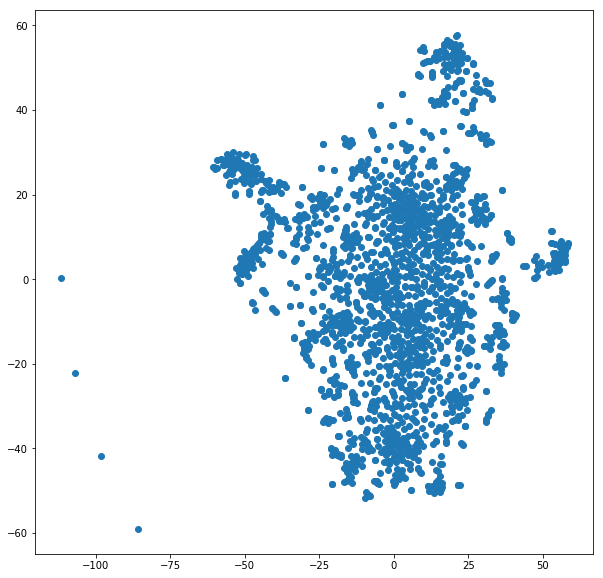

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

#for i, txt in enumerate(z):
#    ax.annotate(txt, (x[i],y[i]))

#plt.savefig('emb_tsne.jpg')
plt.show()

In [28]:
with open('gensim_emb_tsne.txt','w') as out:
    for i in range(553):
        out.write("\t".join([reverse_dictionary[i],str(emb_2d[i,0]),str(emb_2d[i,1])])+'\n')

In [52]:
#### full features 

with open('Data/full_feature.txt','r') as f:
    counter = 0
    full_dict = {}
    for line in f:
        full_dict[line.strip()] = counter
        counter += 1
        
reverse_full_dict = dict(zip(full_dict.values(), full_dict.keys())) 

In [ ]:
# load pkl file
def load_obj(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

emb = load_obj('gensim_full_feature_emb.pkl')
emb_2d = TSNE(n_components=2).fit_transform(emb)   #, perplexity=100, n_iter=1000).fit_transform(emb)

In [55]:
x = emb_2d[:,0]
y = emb_2d[:,1]
z = [reverse_full_dict[key] for key in range(2104)]

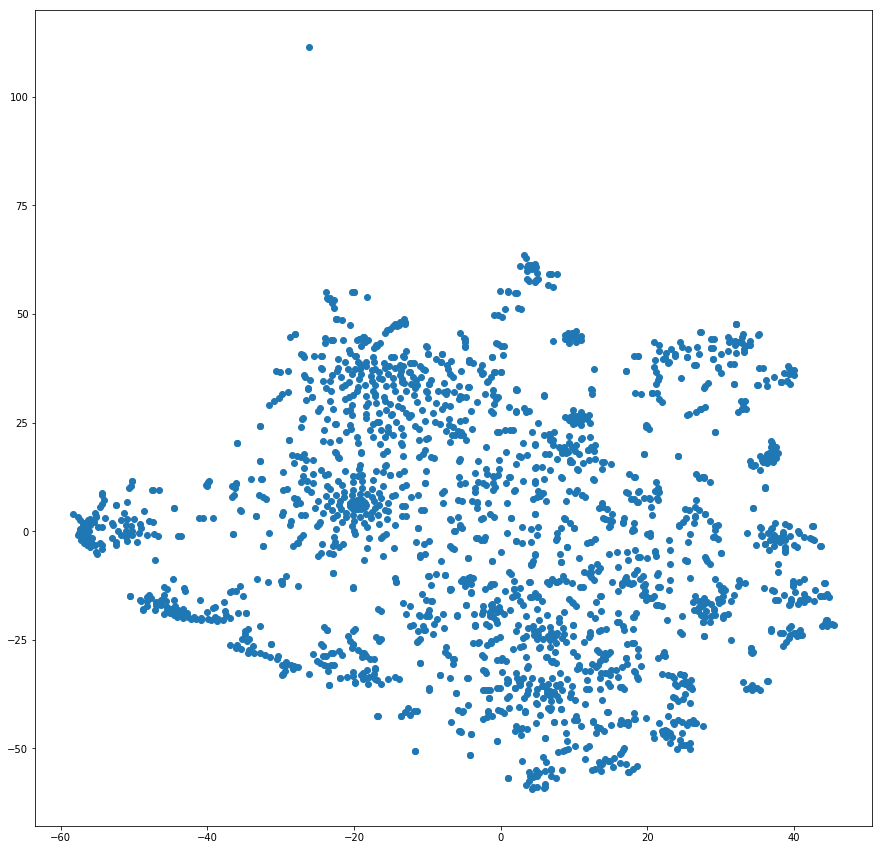

In [56]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x, y)

#for i, txt in enumerate(z):
#    ax.annotate(txt, (x[i],y[i]))

#plt.savefig('emb_tsne.jpg')
plt.show()

In [57]:
with open('gensim_full_feature_emb_tsne.txt','w') as out:
    for i in range(2104):
        out.write("\t".join([reverse_full_dict[i],str(emb_2d[i,0]),str(emb_2d[i,1])])+'\n')